### Exploratory Data Analisys

In [1]:
cd ../

c:\Users\eduar\Documents\usp\AMST\ml_timeseries_usp


In [ ]:
from utils import (
    read_all_csv_files,
    correcting_dtypes,
    stocks_removing_negatives,
    plot_time_series_by_products,
    plot_products_materials,
    plot_produtos_in_cds,
    plot_time_series_cds_products_by_stores,
    plot_time_series_cds_products_by_store_size,
    plot_time_series_cds_products_by_store_weather,
    plot_time_series_cds_products_by_store_profile,
    plot_time_series_cds_products_store_region,
    violin_plot_material_store_sales
    )
import pandas as pd
import seaborn as sns
from hierarchicalforecast.utils import aggregate

In [3]:
pd.set_option('display.max_columns', None)

#### 1. Extract data

In [4]:
df = read_all_csv_files()

#### 2. Basic dataframe infos

In [5]:
df.shape

(979485, 35)

The shape shows basic infomation related to the size of dataframe. Witch is raltive big, but not too much

In [6]:
df.head(5)

,mes,material,sku,produto,cor,tamanho,ordem_tamanho,construcao,padronagem,marca,decote,detalhe,loja,centro_distribuicao,idade_loja,uf_loja,cidade_loja,regiao_loja,bairro_loja,clima_loja,perfil_loja,porte_loja,estoque_unidades_inicio,estoque_unidades_fim,estoque_unidades,estoque_unidades_mediana,prop_dias_com_estoque,venda_unidades,venda_valor_total,preco_medio_unitario,preco_unitario_min,preco_unitario_max,variabilidade_preco_unitario,prop_dias_com_venda,total_observacoes_vendas
0,2023-02-01,045d7d474e1255fba6a784818a34f3fa,13bac94c7ada49b30f8d61924a768de4,x blusa,branco,p,2,circular,liso,9,decote u,sem manga,02568ece-15d4-40d5-b05a-47069ea100e2,CD2,26.0,SP,SAO PAULO,SUDESTE,APARECIDA,2,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0
0,2023-08-01,5cf422a5550730fb73deb1c1b8b07e4f,9882544ee33a5526755c5932737e4df7,x blusa,branco,g,4,malha,liso,9,decote u,sem manga,02568ece-15d4-40d5-b05a-47069ea100e2,CD2,26.0,SP,SAO PAULO,SUDESTE,APARECIDA,2,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0
1,2023-08-01,5cf422a5550730fb73deb1c1b8b07e4f,9882544ee33a5526755c5932737e4df7,x blusa,branco,g,4,malha,liso,9,decote u,sem manga,126bc1f6-f329-48ba-8b94-40aed7f58c45,CD2,6.0,SP,SAO PAULO,SUDESTE,CENTRO,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0
1,2023-02-01,045d7d474e1255fba6a784818a34f3fa,13bac94c7ada49b30f8d61924a768de4,x blusa,branco,p,2,circular,liso,9,decote u,sem manga,5f617d6a-efeb-4a43-89de-4515564aceed,CD2,11.0,SP,SAO PAULO,SUDESTE,VILA REAL,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0
2,2023-08-01,5cf422a5550730fb73deb1c1b8b07e4f,9882544ee33a5526755c5932737e4df7,x blusa,branco,g,4,malha,liso,9,decote u,sem manga,1492be88-5ceb-49c6-98ff-ef90dae05875,CD2,14.0,ES,ESPIRITO SANTO,SUDESTE,EURICO SALLES,3,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0


In [7]:
df.tail(5)

,mes,material,sku,produto,cor,tamanho,ordem_tamanho,construcao,padronagem,marca,decote,detalhe,loja,centro_distribuicao,idade_loja,uf_loja,cidade_loja,regiao_loja,bairro_loja,clima_loja,perfil_loja,porte_loja,estoque_unidades_inicio,estoque_unidades_fim,estoque_unidades,estoque_unidades_mediana,prop_dias_com_estoque,venda_unidades,venda_valor_total,preco_medio_unitario,preco_unitario_min,preco_unitario_max,variabilidade_preco_unitario,prop_dias_com_venda,total_observacoes_vendas
152813,2024-11-01,2bd2f8c04c83bfcdeb2b58fac0c33212,0c57d0c28002f1493e44d35c6be0f12a,blusa,branco,p,2,malha,liso,9,reto,sem manga,fdf39bea-2605-4363-848b-eabff9be6133,CD2,14.0,SP,SAO PAULO,SUDESTE,CERAMICA,1,3,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,0
152814,2024-11-01,2bd2f8c04c83bfcdeb2b58fac0c33212,0c57d0c28002f1493e44d35c6be0f12a,blusa,branco,p,2,circular,liso,9,reto,sem manga,fdf39bea-2605-4363-848b-eabff9be6133,CD2,14.0,SP,SAO PAULO,SUDESTE,CERAMICA,1,3,3,8.0,5.0,7.400000,8.0,1.0,4.0,159.6,39.9,39.9,39.9,0.0,0.133333,5
152815,2024-11-01,2bd2f8c04c83bfcdeb2b58fac0c33212,0c57d0c28002f1493e44d35c6be0f12a,blusa,branco,p,2,malha,liso,9,reto,sem manga,fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147,CD1,28.0,PB,PARAIBA,NORDESTE,MANAIRA,3,3,4,5.0,3.0,3.933333,4.0,1.0,2.0,79.8,39.9,39.9,39.9,0.0,0.066667,2
152816,2024-11-01,2bd2f8c04c83bfcdeb2b58fac0c33212,0c57d0c28002f1493e44d35c6be0f12a,blusa,branco,p,2,circular,liso,9,reto,sem manga,fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147,CD1,28.0,PB,PARAIBA,NORDESTE,MANAIRA,3,3,4,5.0,17.0,6.366667,5.0,1.0,3.0,119.7,39.9,39.9,39.9,0.0,0.066667,2
152817,2024-11-01,2bd2f8c04c83bfcdeb2b58fac0c33212,0c57d0c28002f1493e44d35c6be0f12a,blusa,branco,p,2,malha,liso,9,sem decote,sem manga,fe26d5e6-bfb7-4a55-a6a7-f85cc3cd2147,CD1,28.0,PB,PARAIBA,NORDESTE,MANAIRA,3,3,4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,0


#### Correctring datatypes


In [8]:
df = correcting_dtypes(df)

In [9]:
df.dtypes

mes                             datetime64[ns]
material                                object
sku                                     object
produto                                 object
cor                                     object
tamanho                                 object
ordem_tamanho                            int64
construcao                              object
padronagem                              object
marca                                   object
decote                                  object
detalhe                                 object
loja                                    object
centro_distribuicao                     object
idade_loja                               int64
uf_loja                                 object
cidade_loja                             object
regiao_loja                             object
bairro_loja                             object
clima_loja                              object
perfil_loja                             object
porte_loja   

First view shows key information about date, material,stores and sku. There are a lot of columns with information about product, stocks sales. And there are missing values related to price.

#### 4. Basic stats

In [10]:
df.describe()

,mes,ordem_tamanho,idade_loja,estoque_unidades_inicio,estoque_unidades_fim,estoque_unidades,estoque_unidades_mediana,prop_dias_com_estoque,venda_unidades,venda_valor_total,preco_medio_unitario,preco_unitario_min,preco_unitario_max,variabilidade_preco_unitario,prop_dias_com_venda,total_observacoes_vendas
count,979485,979485.000000,979485.000000,979485.000000,979485.000000,979485.000000,979485.000000,979485.000000,979485.000000,979485.000000,259847.000000,259847.000000,259847.000000,165978.000000,979485.000000,979485.000000
mean,2024-04-22 04:11:25.080016640,3.203220,16.572751,0.932905,0.935735,0.927376,0.915708,0.316369,0.882000,42.093815,53.259734,51.509032,54.238507,2.208921,0.025871,0.798609
min,2023-02-01 00:00:00,1.000000,0.000000,-13.000000,-13.000000,-10.354839,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-09-01 00:00:00,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.900000,29.900000,29.990000,0.000000,0.000000,0.000000
50%,2024-05-01 00:00:00,3.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.900000,39.900000,39.900000,0.000000,0.000000,0.000000
75%,2024-12-01 00:00:00,4.000000,19.000000,1.000000,1.000000,1.100000,1.000000,0.925926,1.000000,29.900000,49.900000,49.900000,49.900000,2.954977,0.032258,1.000000
max,2025-07-01 00:00:00,9.000000,54.000000,69.000000,69.000000,59.548387,61.000000,1.000000,66.000000,4493.770000,179.900000,179.900000,179.900000,98.924239,1.000000,27.000000
std,NaN,1.716345,10.440480,2.005210,2.001553,1.869009,1.916312,0.439082,2.250869,111.835862,37.855781,37.840019,38.171466,4.179983,0.060401,1.866721


The cutoff dates goes from "2023-02-01" to "2025-07-01" (2 and half years). The size columns are centrered in 3 and maximum on 9 witch makes sense for most part of clothes has a standard display ("pp","p","m","g","gg"), in terms of size order should be (1,2,3,4,5) centring in number 3 as a medium size, but exists higher and lower displays pushing the max value to 9. 

In [11]:
df['produto'].unique()

array(['x blusa', 'calca', 'camiseta', 'blusa'], dtype=object)

As commented before, blusa and camiseta has the standard display sizes, but calca has higer display sizes.

the age of the stores looks normal, the higher value is less than enterprise foundation and has stores oppened this year witch makes sense be 0. 

However stocks values has negative integers that need to be transformed to 0. One important aspect of stock's data is a half part of observations are 0, and a quarter of it is 1. So the max value of 69 can be a outlier, and the volumety  of data probably is sku in stores per day.

Sales records distribution is very similar and should be analyse in outlier remove approach.

The prices records are the most problem feature, because there are a lot of missing values ~75%. Probably the best way to deal with it is drop and exctract average values from sales.

#### 5. cleanning

In [12]:
df = stocks_removing_negatives(df)

#### TimeSeries Data Analysis

Top Down

Produtos/familia

In [13]:
int(df['produto'].isnull().sum())

0

NameError: name 'sns' is not defined

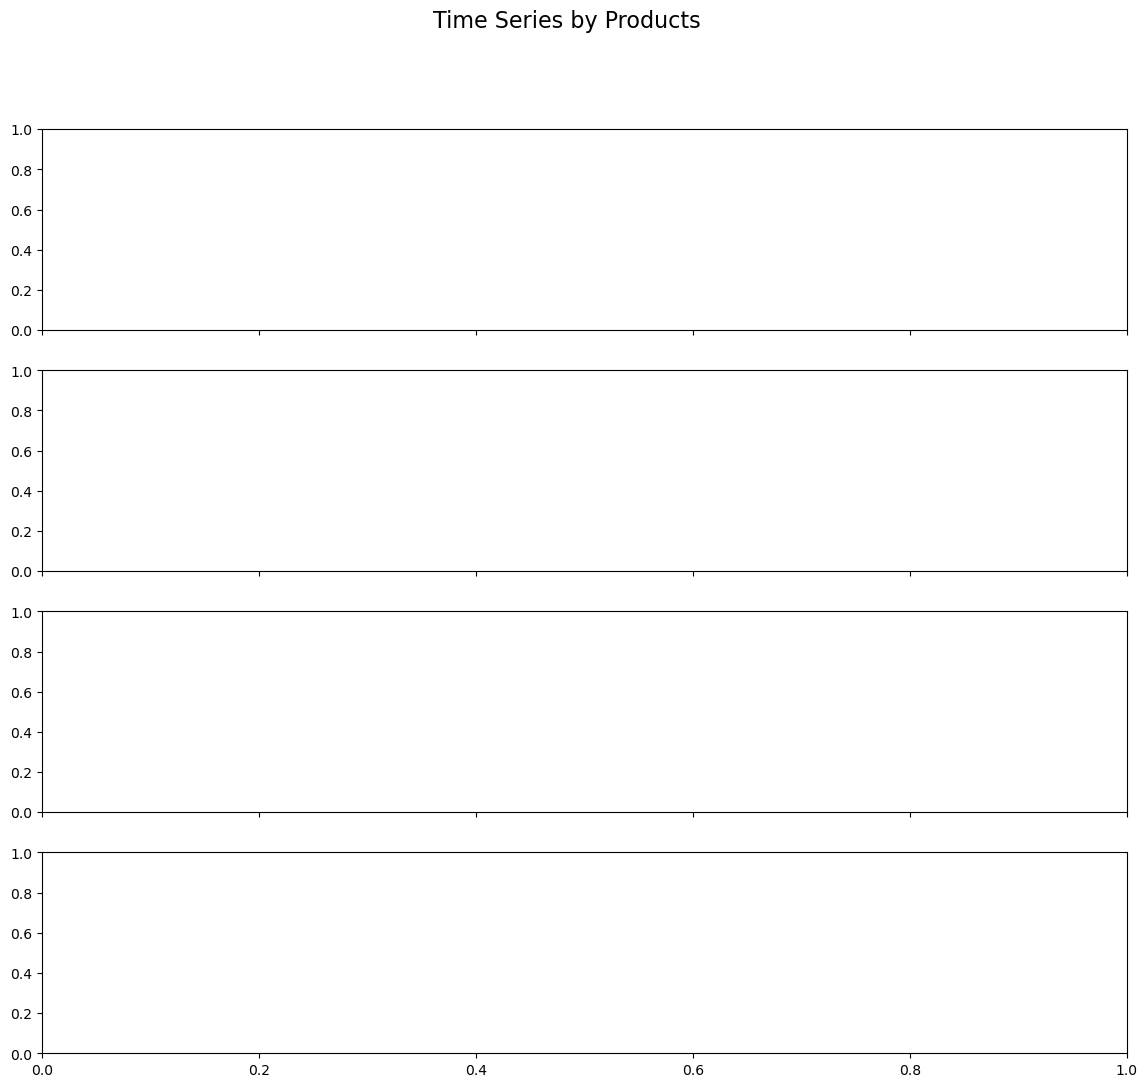

In [14]:
plot_time_series_by_products(df)

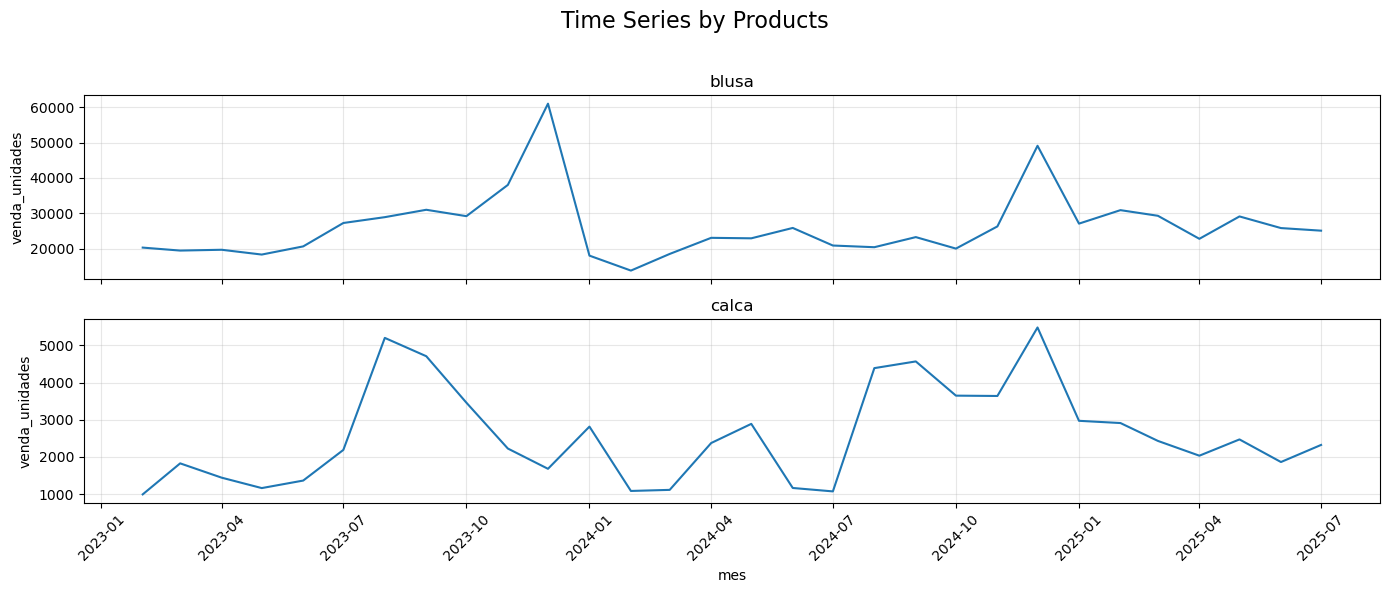

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'blusa'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'calca'}, xlabel='mes', ylabel='venda_unidades'>],
       dtype=object))

In [ ]:
df = df[(df['produto']!='x blusa') & (df['produto']!='camiseta')]
plot_time_series_by_products(df)

#### material/produto

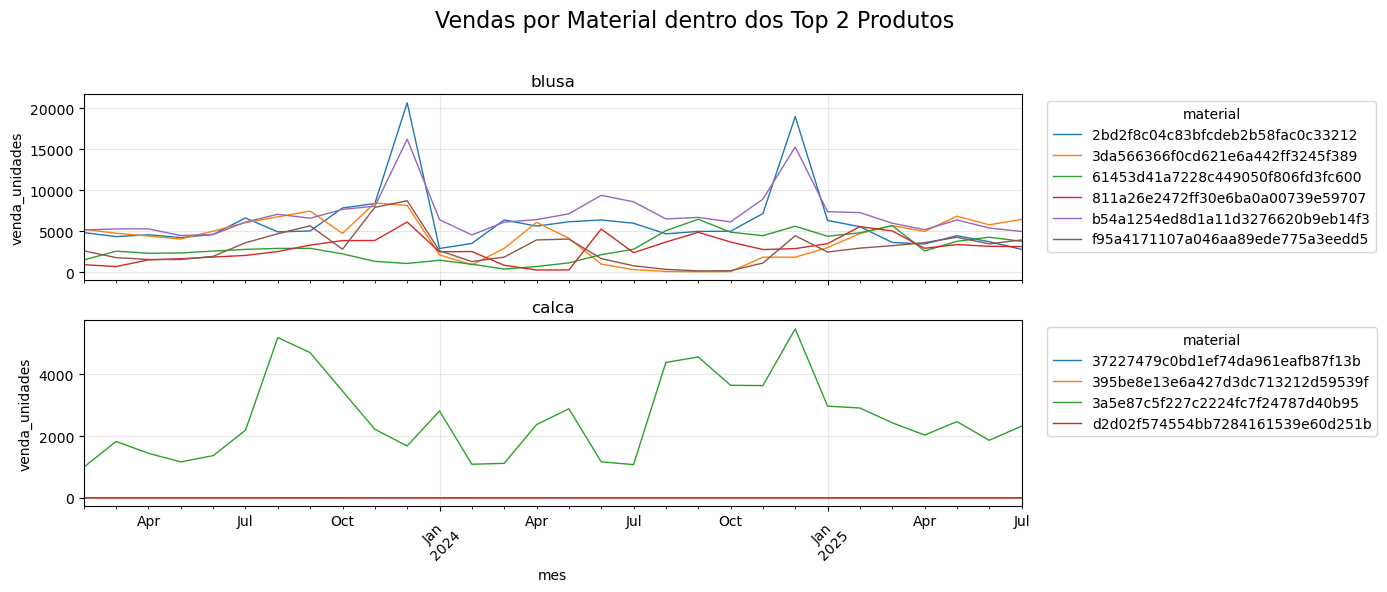

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'blusa'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'calca'}, xlabel='mes', ylabel='venda_unidades'>],
       dtype=object))

In [ ]:
plot_products_materials(df, n_products=2, title='Vendas por Material dentro dos Top 2 Produtos')

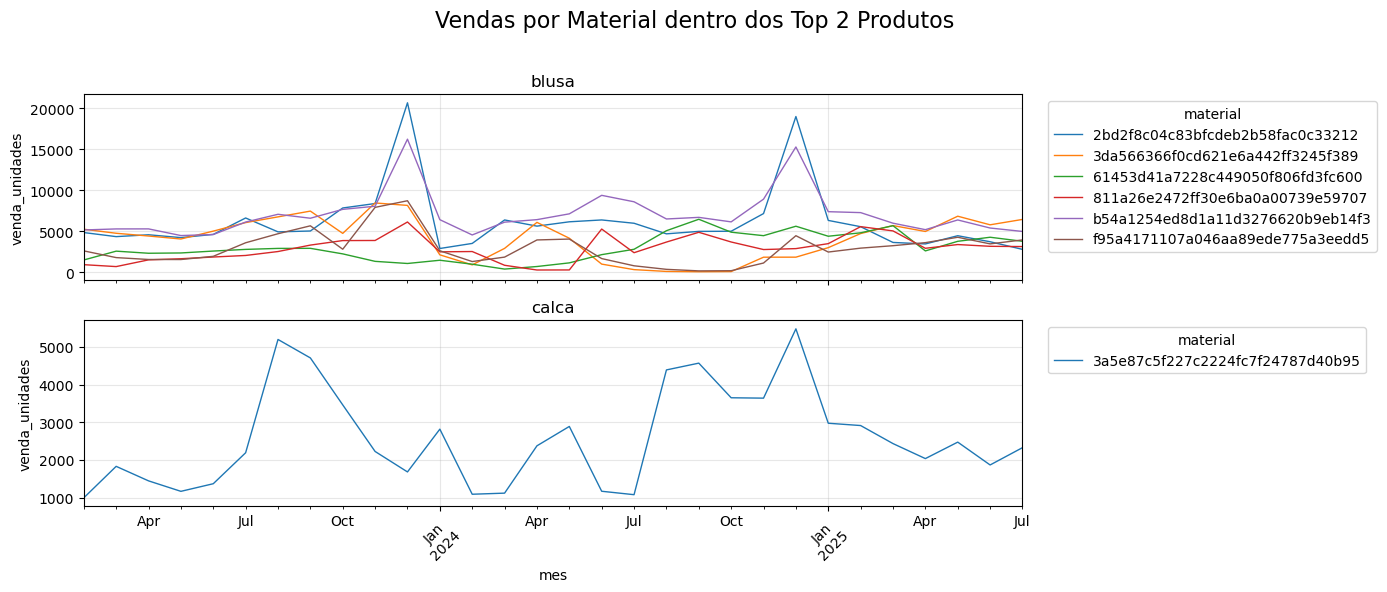

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'blusa'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'calca'}, xlabel='mes', ylabel='venda_unidades'>],
       dtype=object))

In [ ]:
df = df[~df['material'].isin(
    [
        'd2d02f574554bb7284161539e60d251b',
        '37227479c0bd1ef74da961eafb87f13b',
	     '395be8e13e6a427d3dc713212d59539f'
    ])]
plot_products_materials(df, n_products=2, title='Vendas por Material dentro dos Top 2 Produtos')

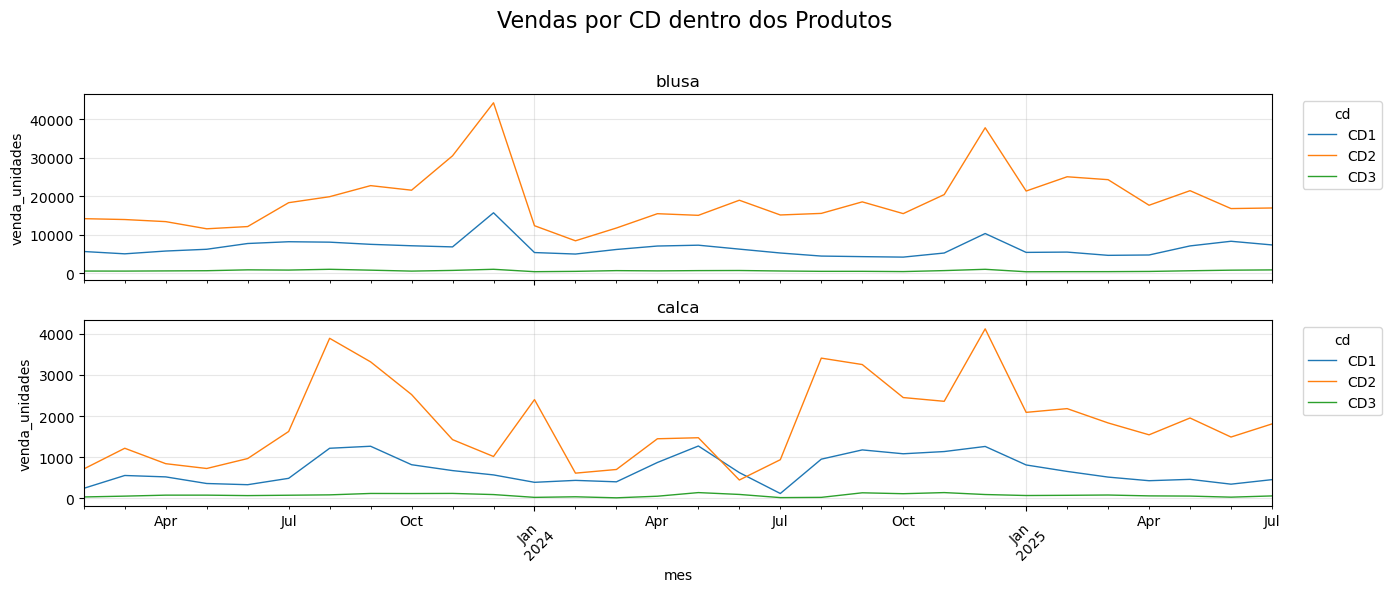

(<Figure size 1400x600 with 2 Axes>,
 array([<Axes: title={'center': 'blusa'}, xlabel='mes', ylabel='venda_unidades'>,
        <Axes: title={'center': 'calca'}, xlabel='mes', ylabel='venda_unidades'>],
       dtype=object))

In [ ]:
plot_produtos_in_cds(df, n_products=2, title='Vendas por CD dentro dos Produtos')

In [ ]:
df['clima_loja'].isnull().sum()

np.int64(0)

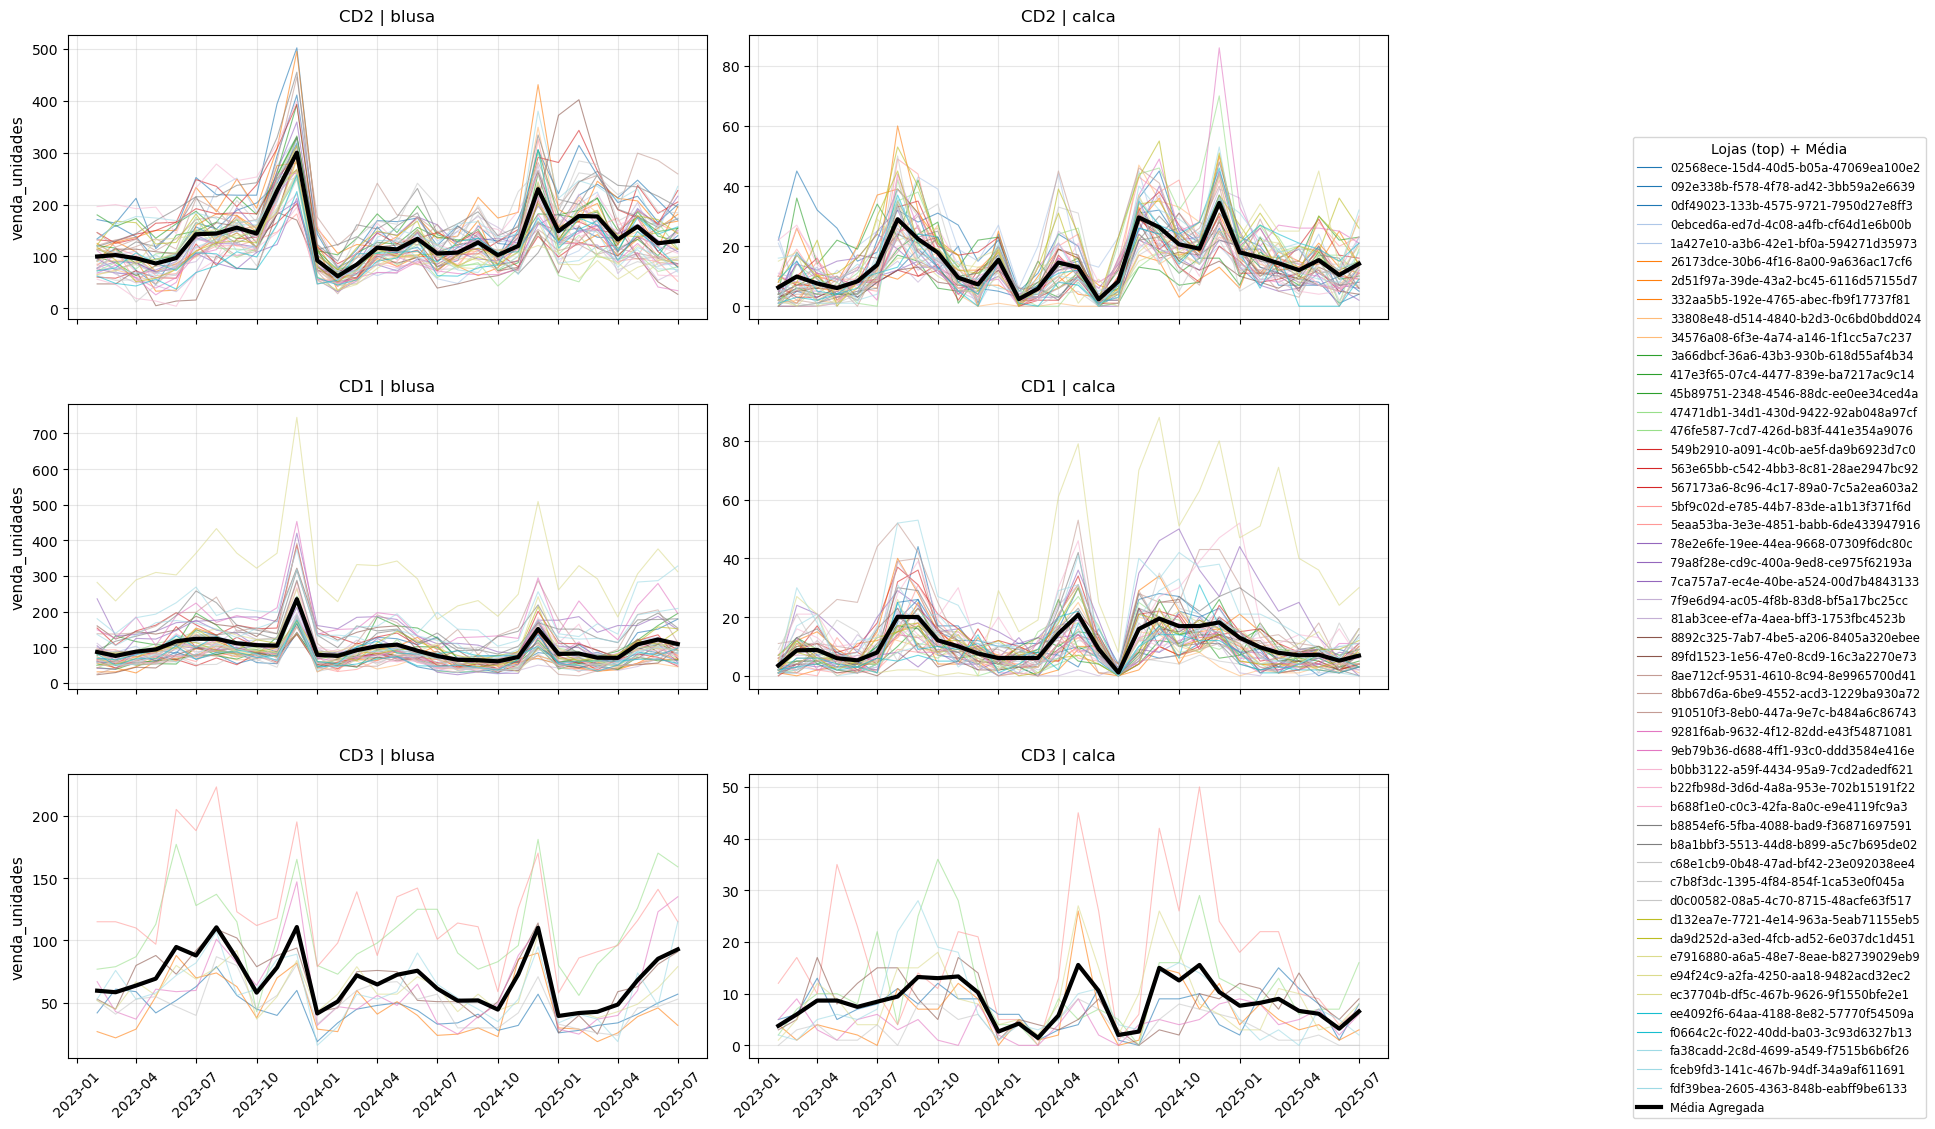

(<Figure size 1600x1140 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2 | blusa'}, ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2 | calca'}>],
        [<Axes: title={'center': 'CD1 | blusa'}, ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1 | calca'}>],
        [<Axes: title={'center': 'CD3 | blusa'}, ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3 | calca'}>]], dtype=object))

In [15]:
plot_time_series_cds_products_by_stores(df, n_rows=3, n_cols=2, top_stores=50, show_legend=True)

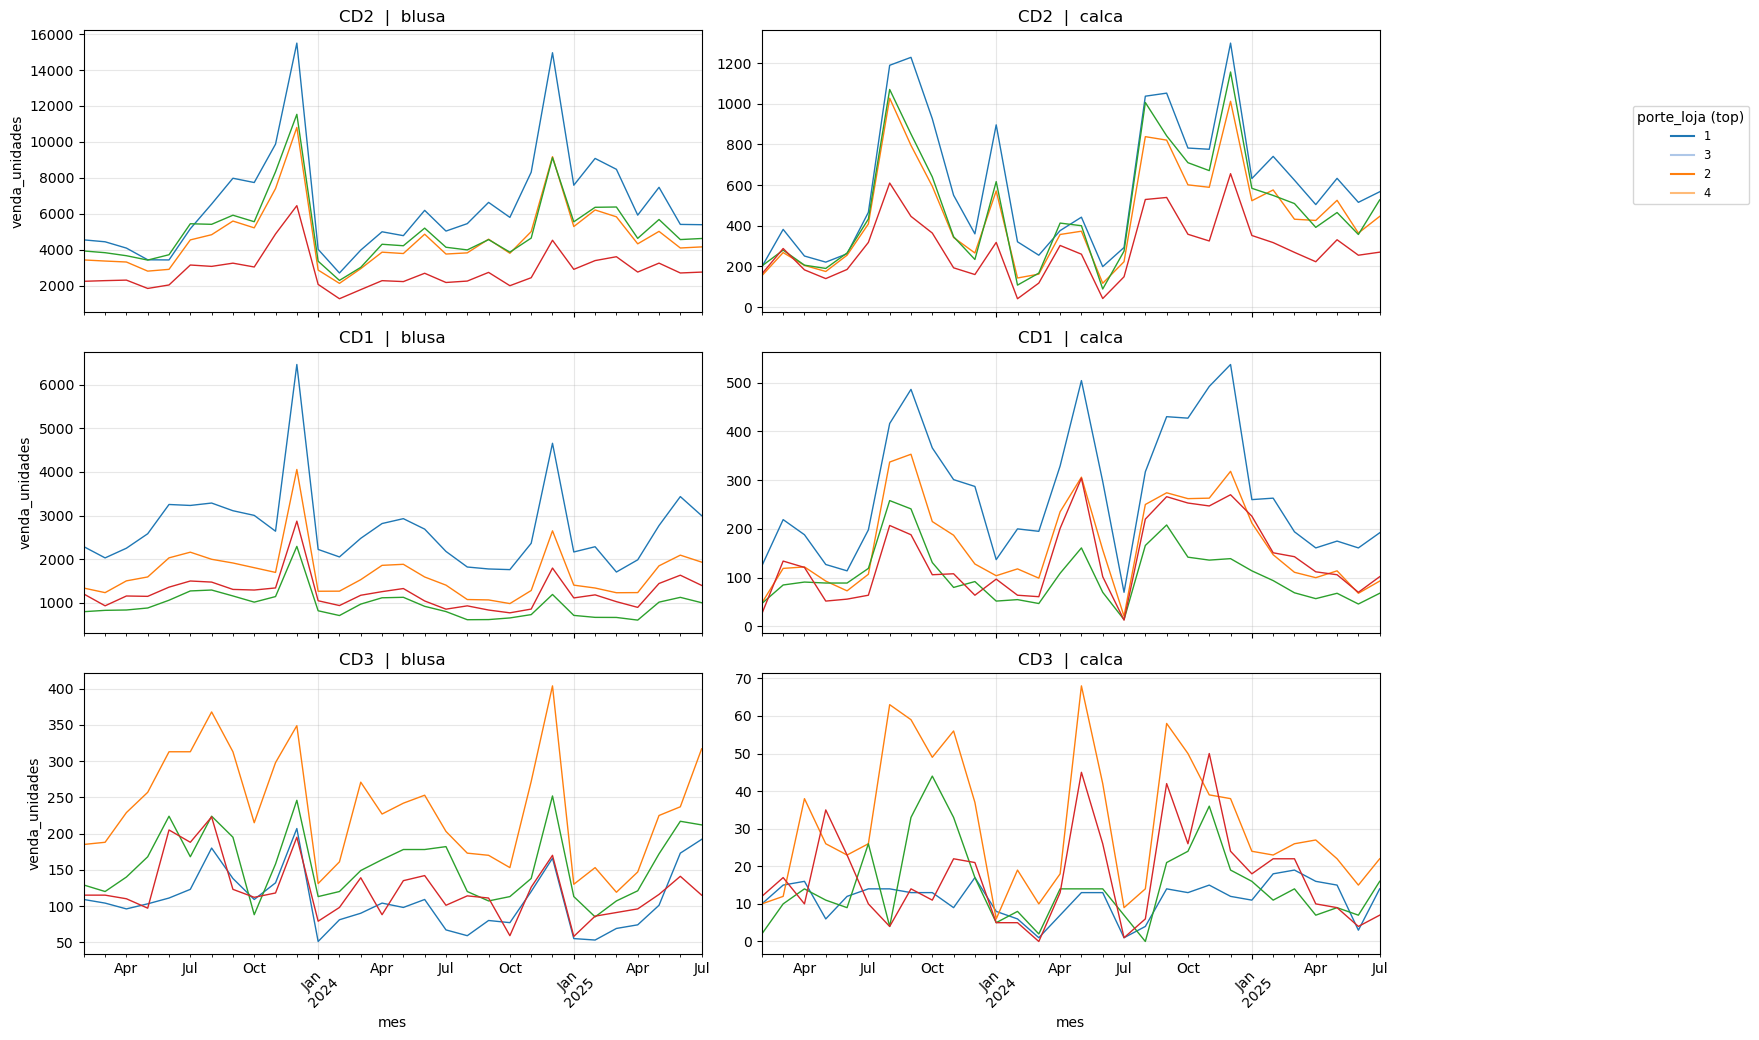

(<Figure size 1600x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD1  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD3  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3  |  calca'}, xlabel='mes'>]],
       dtype=object))

In [16]:
# chama a função atualizada: 3 linhas (CDs) x 2 colunas (produtos)
plot_time_series_cds_products_by_store_size(df, n_rows=3, n_cols=2, top_stores=20)


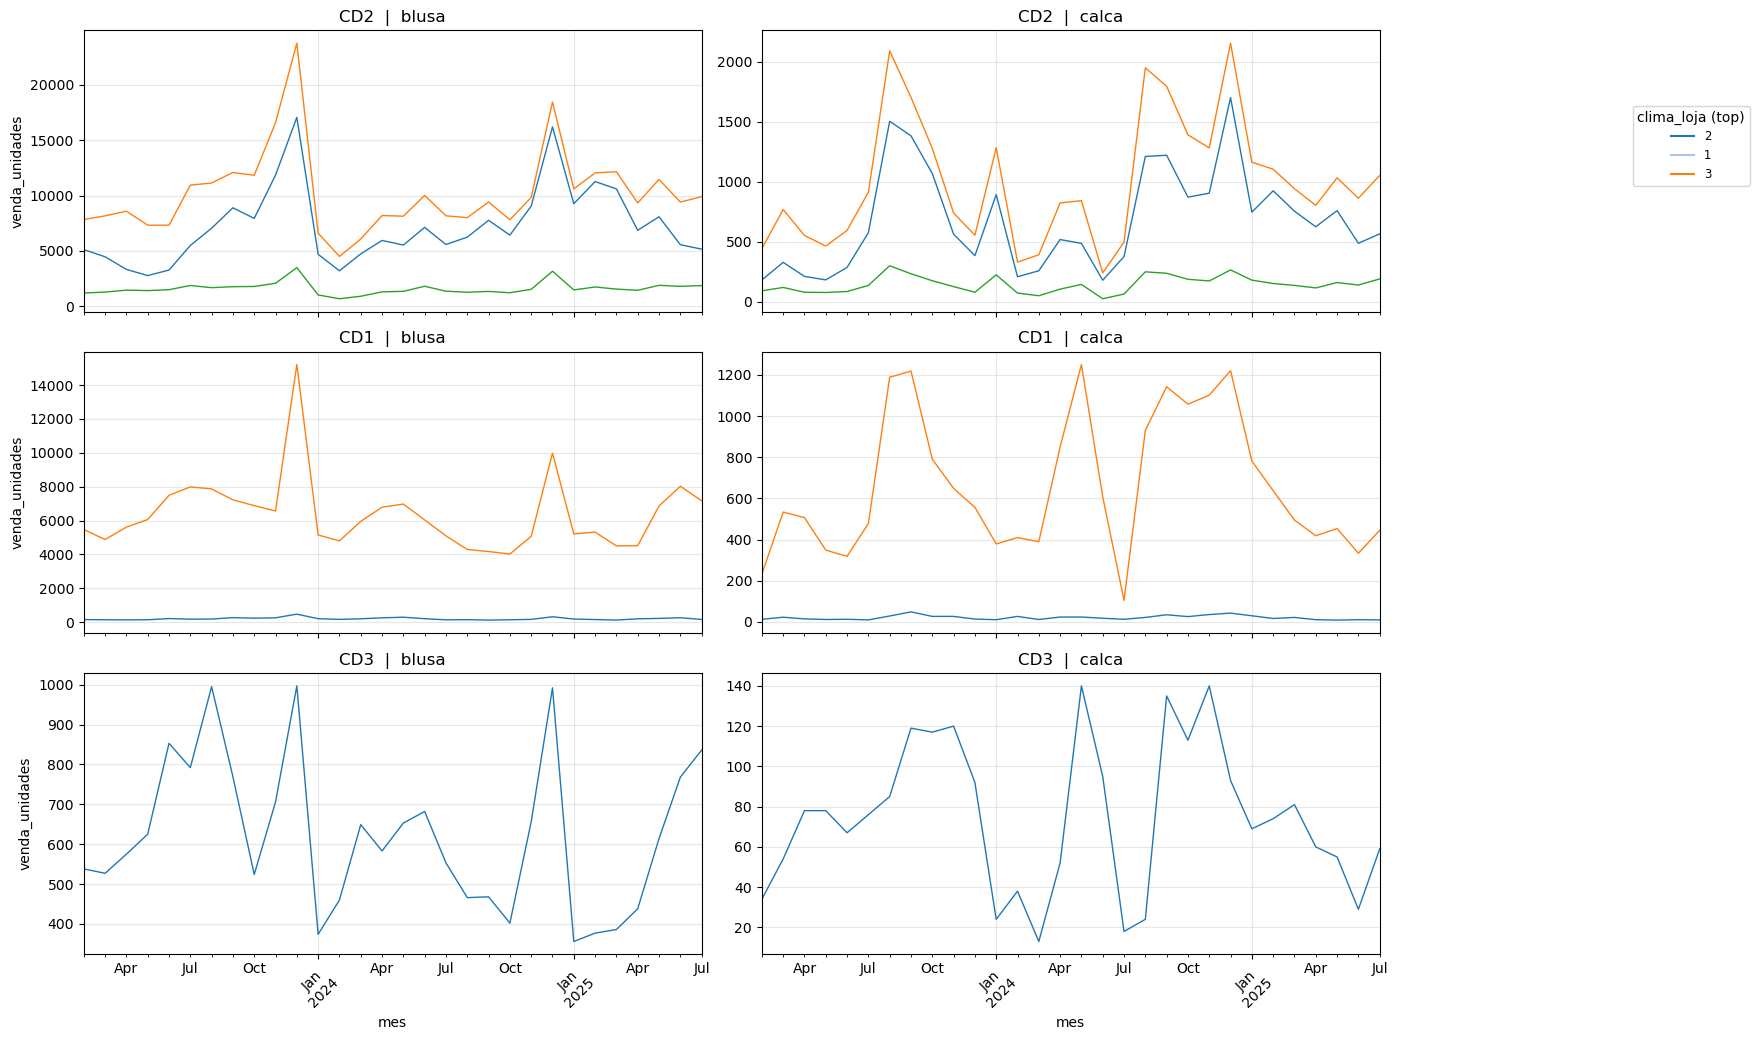

(<Figure size 1600x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD1  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD3  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3  |  calca'}, xlabel='mes'>]],
       dtype=object))

In [17]:
# chama a função atualizada: 3 linhas (CDs) x 2 colunas (produtos)
plot_time_series_cds_products_by_store_weather(df, n_rows=3, n_cols=2, top_stores=20)

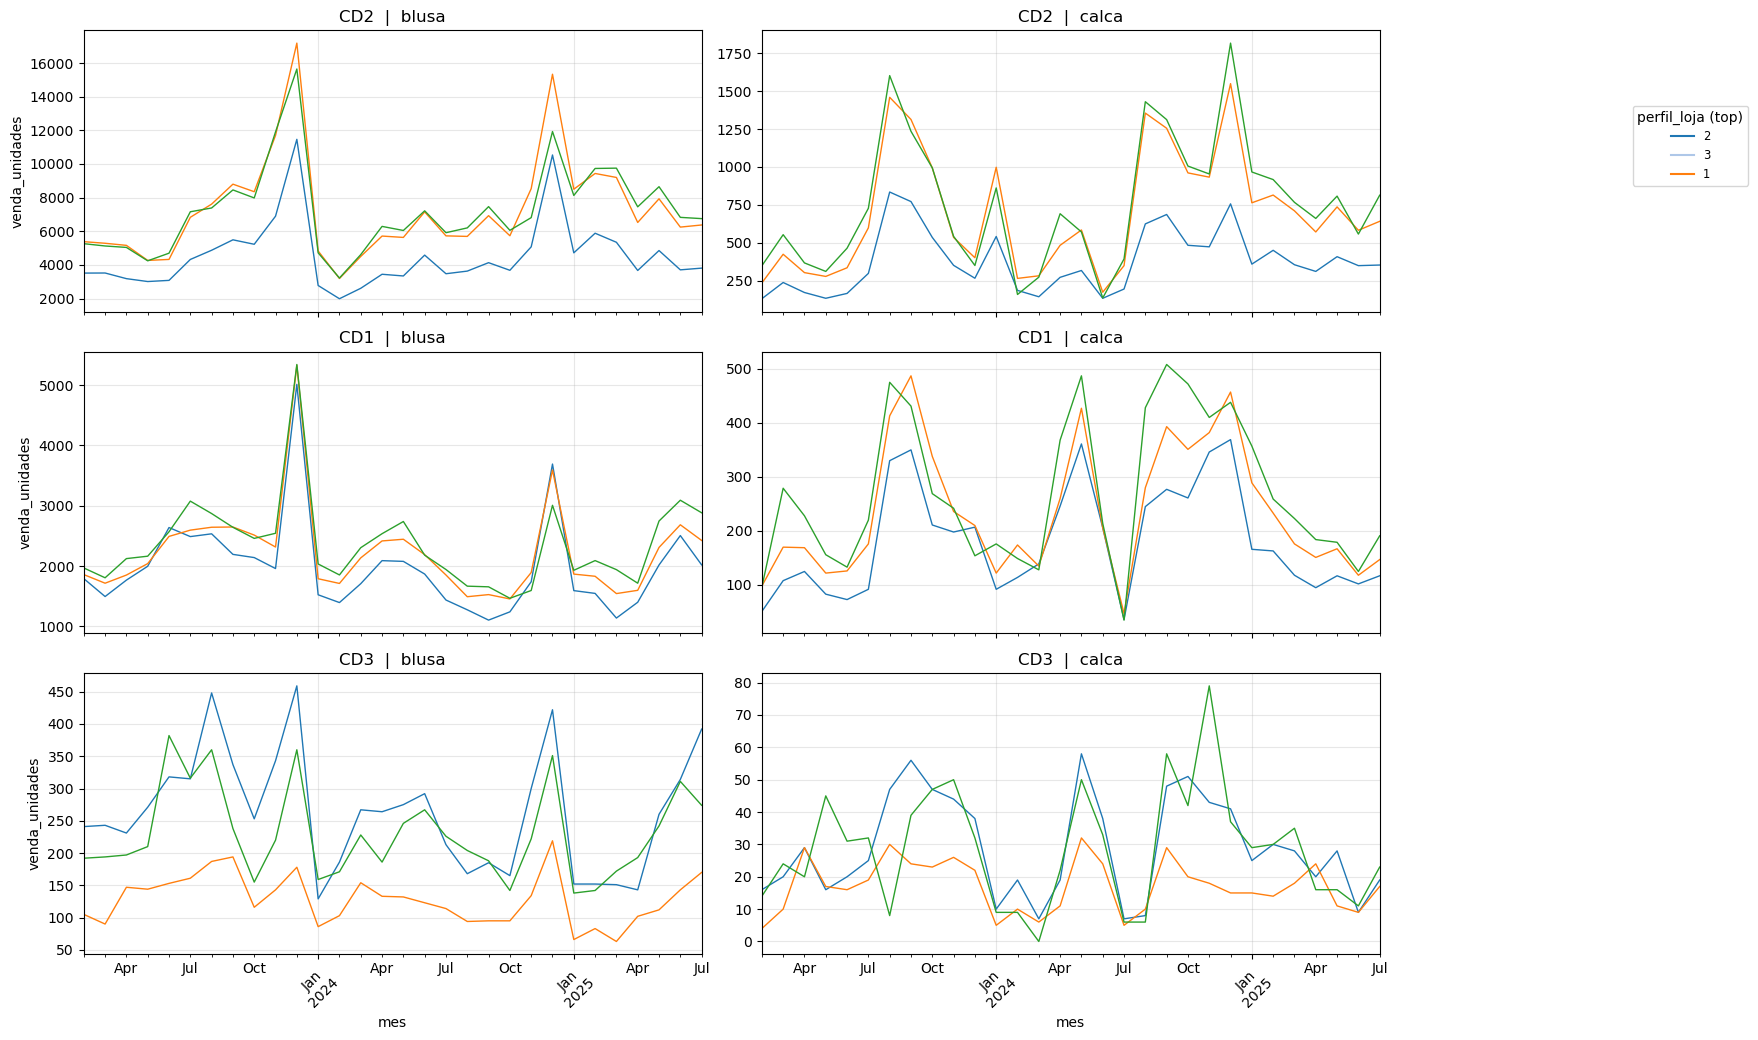

(<Figure size 1600x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD1  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD3  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3  |  calca'}, xlabel='mes'>]],
       dtype=object))

In [18]:
# chama a função atualizada: 3 linhas (CDs) x 2 colunas (produtos)
plot_time_series_cds_products_by_store_profile(df, n_rows=3, n_cols=2, top_stores=20)

In [19]:
df['regiao_loja']

0          SUDESTE
0          SUDESTE
1          SUDESTE
1          SUDESTE
2          SUDESTE
            ...   
152813     SUDESTE
152814     SUDESTE
152815    NORDESTE
152816    NORDESTE
152817    NORDESTE
Name: regiao_loja, Length: 979485, dtype: object

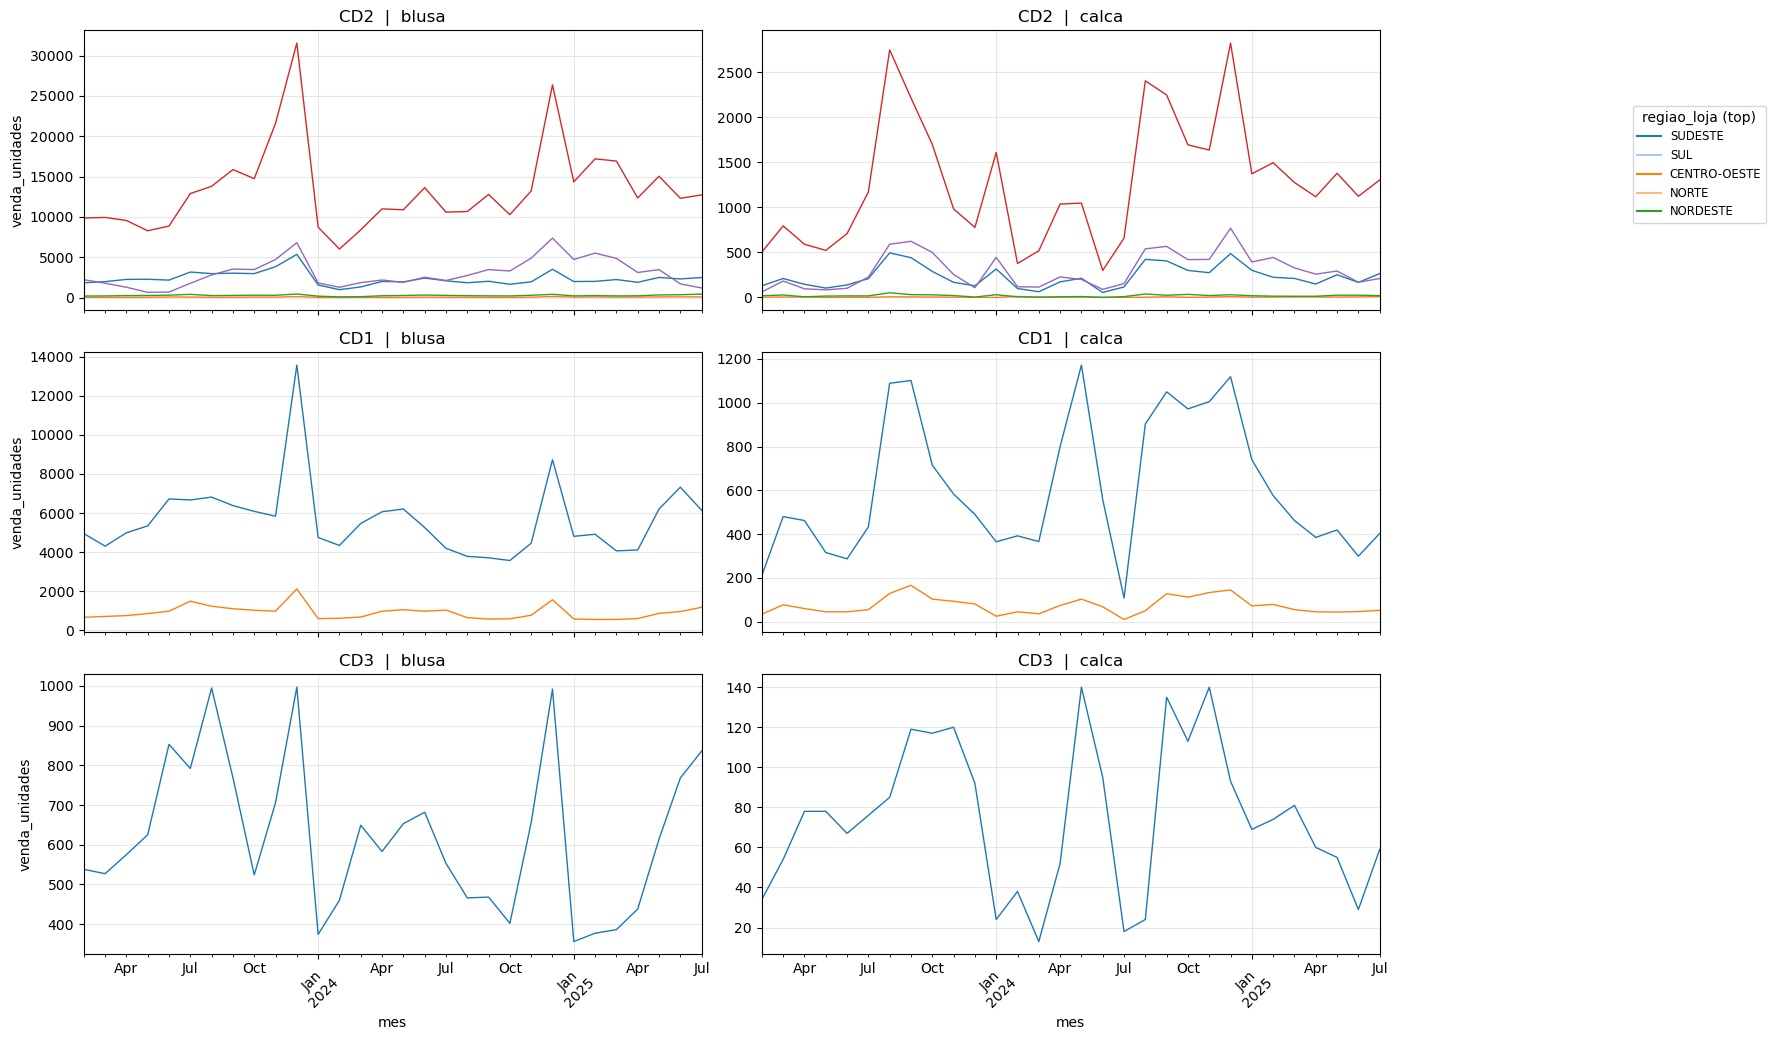

(<Figure size 1600x1050 with 6 Axes>,
 array([[<Axes: title={'center': 'CD2  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD2  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD1  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD1  |  calca'}, xlabel='mes'>],
        [<Axes: title={'center': 'CD3  |  blusa'}, xlabel='mes', ylabel='venda_unidades'>,
         <Axes: title={'center': 'CD3  |  calca'}, xlabel='mes'>]],
       dtype=object))

In [20]:
plot_time_series_cds_products_store_region(df, n_rows=3, n_cols=2, top_stores=20)

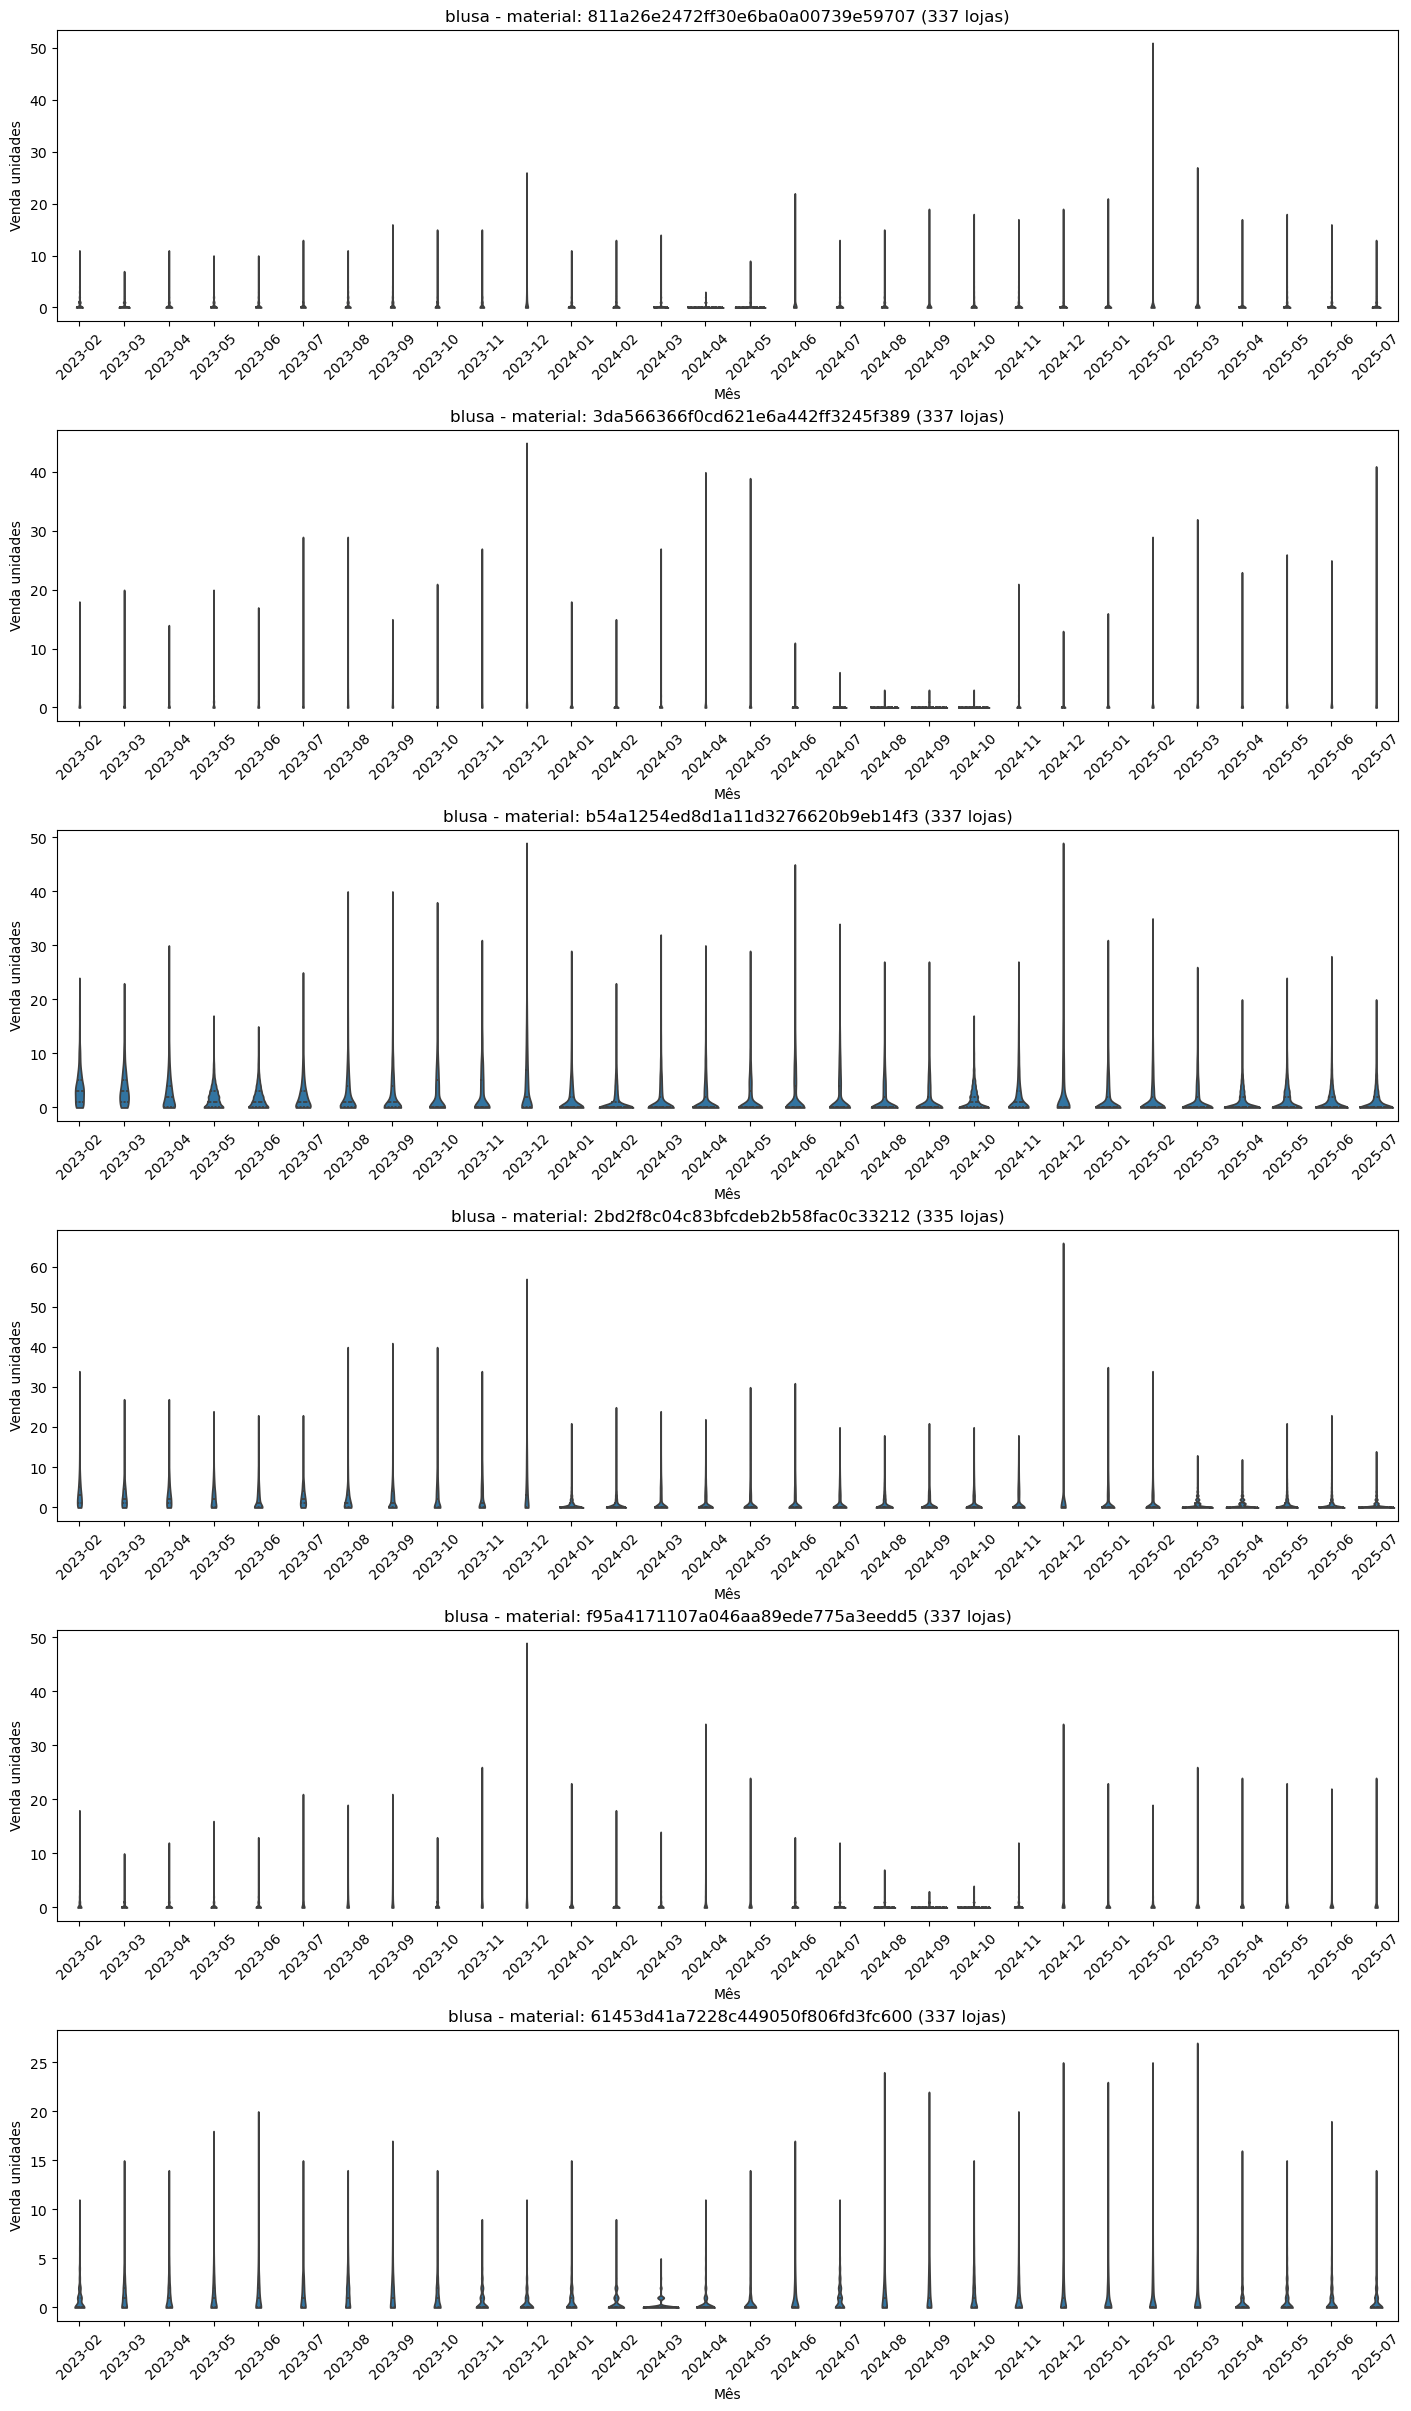

In [ ]:
violin_plot_material_store_sales(df, 'blusa', materials=None)

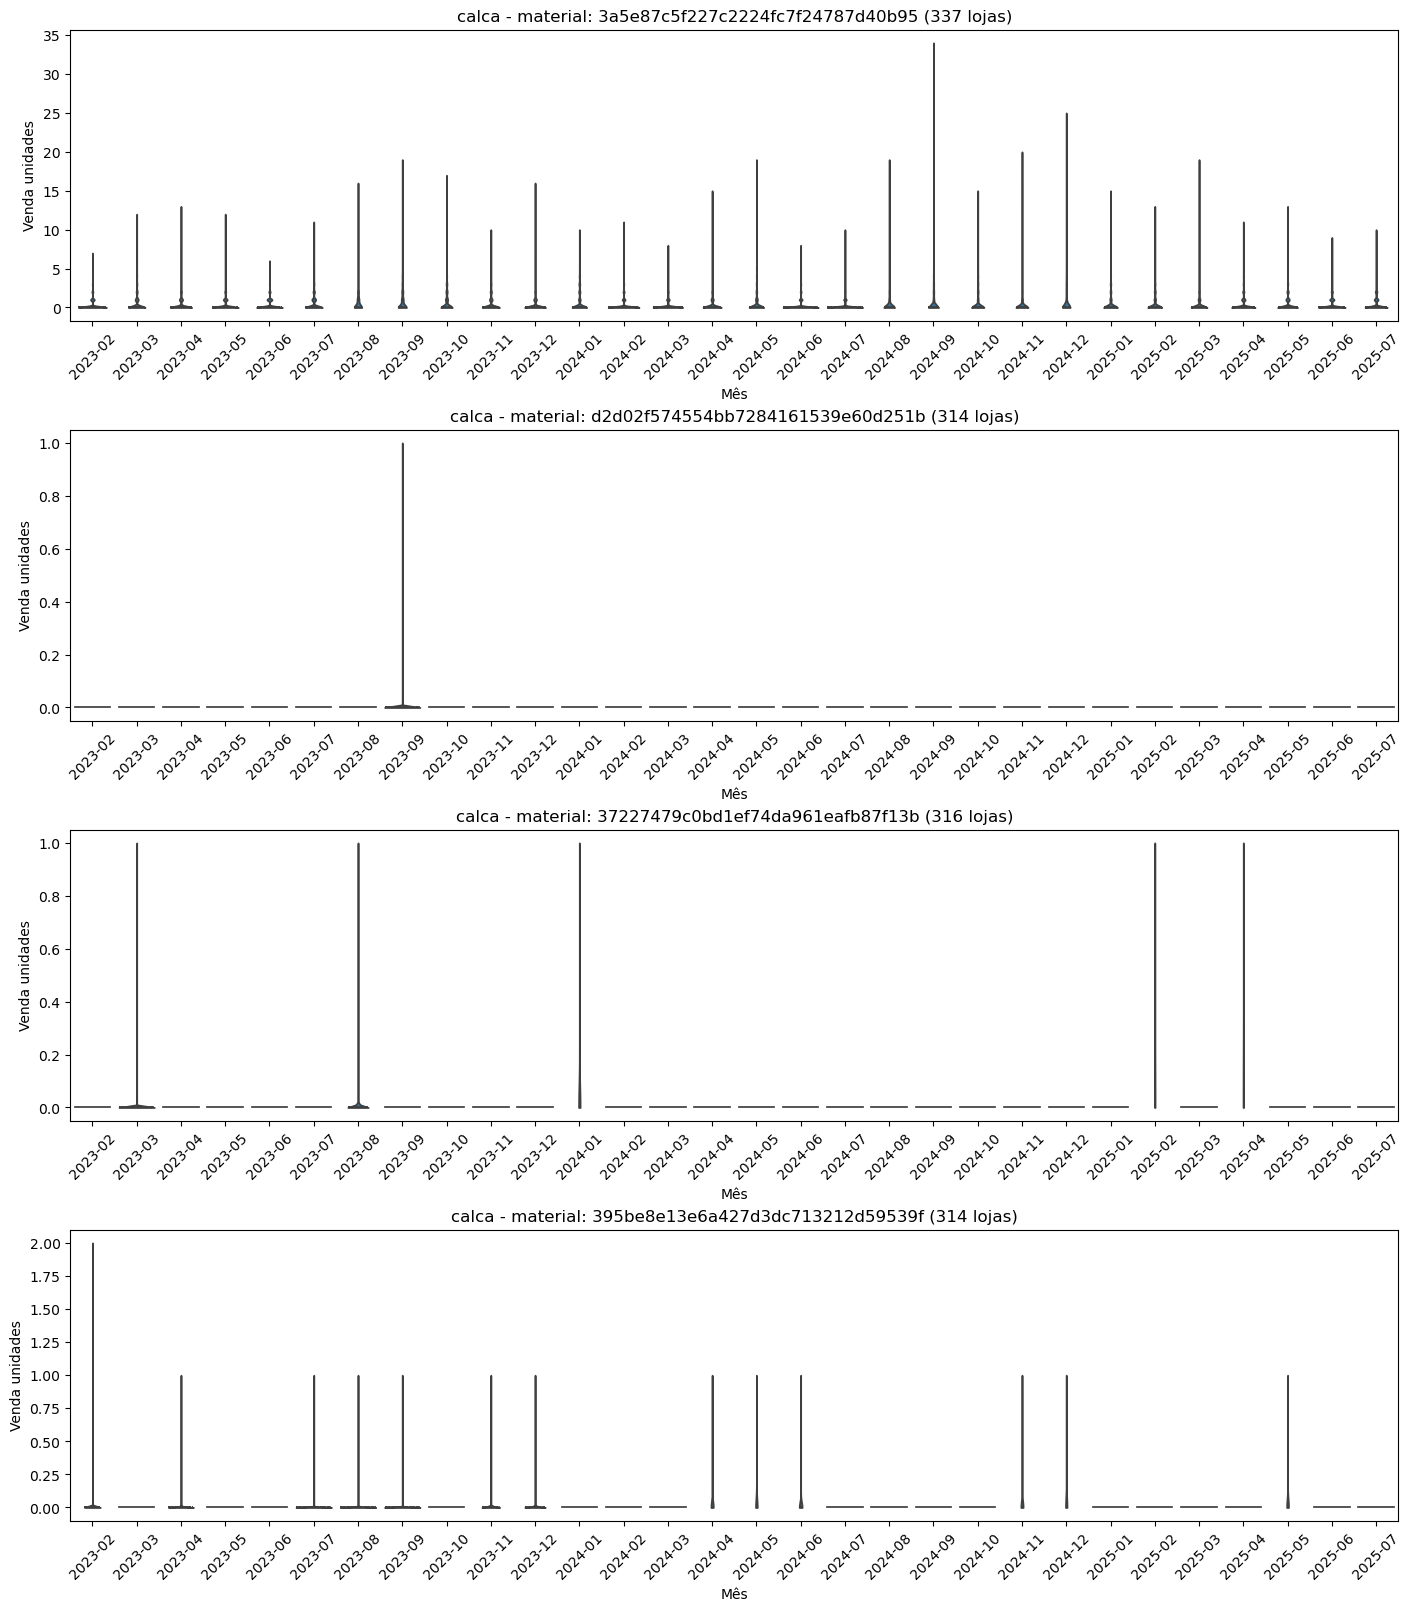

In [40]:
violin_plot_material_store_sales(df, 'calca', materials=None)

In [ ]:
# 1. Limpeza (baseado no seu df.describe())
df_h = df.copy()
df_h = df_h.dropna(subset=['venda_unidades', 'centro_distribuicao', 'regiao_loja', 'clima_loja', 'produto', 'material', 'sku'])
df_h = df_h[['mes','venda_unidades', 'centro_distribuicao', 'regiao_loja', 'clima_loja','loja','produto', 'material', 'sku']]
df_h.columns = ['ds','y', 'centro_distribuicao', 'regiao_loja', 'clima_loja','loja', 'produto', 'material', 'sku']

df_h['ds'] = pd.to_datetime(df_h['ds'])
df_h = df_h.sort_values('ds')

print(f"Shape após limpeza: {df_h.shape}")  # Verifique redução

# 2. Definir hierarquia (otimizada: cds > regiao > clima > produto > material > sku)
# Omiti porte/perfil por ora (baixa variância); adicione se R² justificar
spec = [
    ['centro_distribuicao'],
    ['centro_distribuicao','regiao_loja'],
    ['centro_distribuicao','regiao_loja','clima_loja'],
    ['centro_distribuicao','regiao_loja','clima_loja','loja'],
    ['centro_distribuicao','regiao_loja','clima_loja','loja','produto'],
    ['centro_distribuicao','regiao_loja','clima_loja','loja','produto','material'],
    ['centro_distribuicao','regiao_loja','clima_loja','loja','produto','material','sku']
]

# 3. Agregar (corrigido: target_col em vez de y_col)
y_hier, S, tags = aggregate(
    df=df_h,
    spec=spec
)

print("Níveis criados:")
for k, v in tags.items():
    print(f"{k}: {len(v)} séries")

c:\Users\eduar\AppData\Local\anaconda3\envs\or-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape após limpeza: (852942, 9)
Níveis criados:
centro_distribuicao: 3 séries
centro_distribuicao/regiao_loja: 8 séries
centro_distribuicao/regiao_loja/clima_loja: 13 séries
centro_distribuicao/regiao_loja/clima_loja/loja: 337 séries
centro_distribuicao/regiao_loja/clima_loja/loja/produto: 674 séries
centro_distribuicao/regiao_loja/clima_loja/loja/produto/material: 2357 séries
centro_distribuicao/regiao_loja/clima_loja/loja/produto/material/sku: 11712 séries


Dropar as times series de x blusa e camiseta

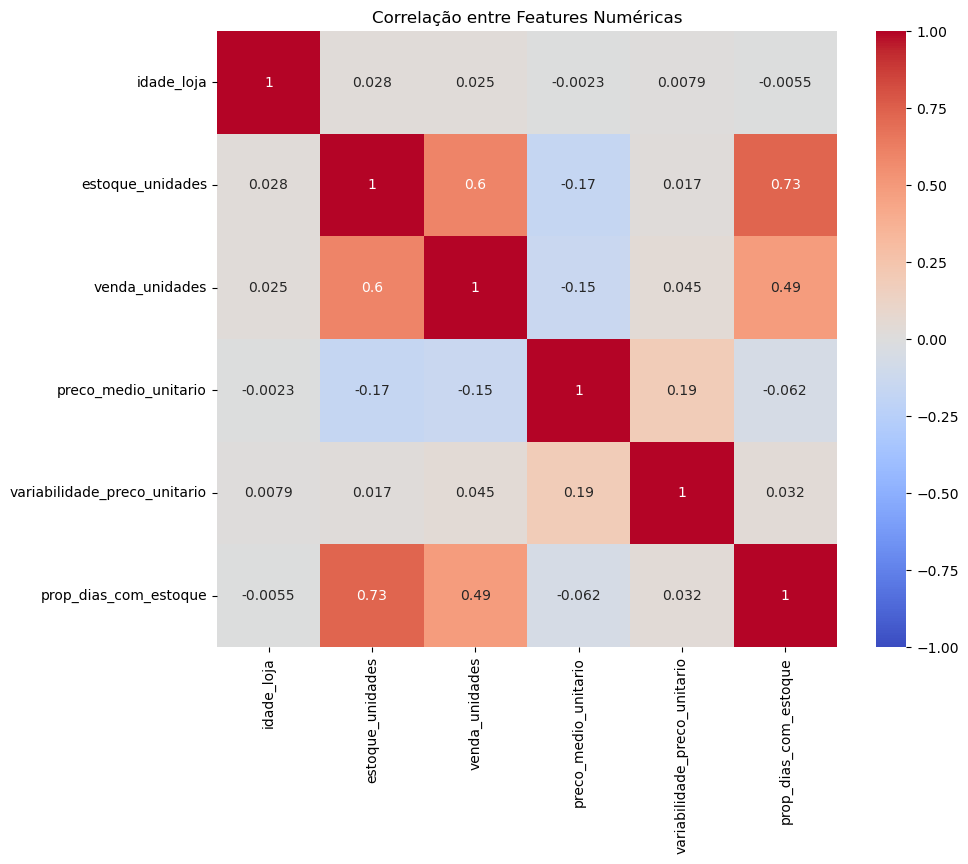

In [30]:
num_cols = ['idade_loja', 'estoque_unidades', 'venda_unidades', 'preco_medio_unitario', 'variabilidade_preco_unitario', 'prop_dias_com_estoque']
corr = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Features Numéricas')
plt.show()